# Homework 3

- Name: Veronica Alejandro
- UT EID: vaa678

- Name: Tori Garfield
- UT EID: teg755

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [111]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import researchpy as rp
# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [124]:
participants = pd.read_csv('participants.csv')
non_participants = pd.read_csv('nonparticipants.csv')

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**


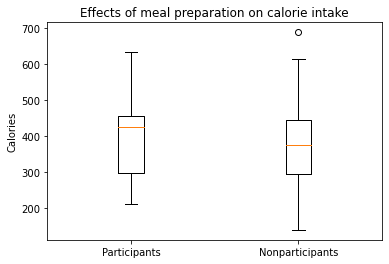

,Participants,Non-participants
Mean,410.079600,374.071818
Median,424.940000,374.740000
Sample Size,25.000000,22.000000
Standard Deviation,121.513786,133.139285
Variance,14765.600229,17726.069149
IQR,157.920000,149.165000


In [121]:
fig, ax = plt.subplots()
columns = [participants.values.flatten(), nonparticipants.values.flatten()]
ax.boxplot(columns)
ax.set_ylabel('Calories')
ax.set_title('Effects of meal preparation on calorie intake')
plt.xticks([1, 2], ['Participants', 'Nonparticipants'])
plt.show()

p_mean = participants.mean()
p_median = participants.median()
p_n = len(participants)
p_std = participants.std()
p_var = participants.var()
p_iqr = sp.stats.iqr(participants)

np_mean = non_participants.mean()
np_median = non_participants.median()
np_n = len(non_participants)
np_std = non_participants.std()
np_var = non_participants.var()
np_iqr = sp.stats.iqr(non_participants)

data = {'Participants': [p_mean[0], p_median[0], p_n, p_std[0], p_var[0], p_iqr], 'Non-participants': [np_mean[0], np_median[0], np_n, np_std[0], np_var[0], np_iqr]}
table = pd.DataFrame(data, index=['Mean', 'Median', 'Sample Size', 'Standard Deviation', 'Variance', 'IQR'])
table

# The median calorie intake for participants is higher than for nonparticipants. In nonparticipants, there is one outlier 
# that consumed 688.77 calories, which can skew data. The minimum for nonparticipants was lower than 
# the minimum calorie intake for participants.
# For nonparticipants, the mean and the median were almost equal. For participants, the mean was lower than the median.
# The IQR for participants is slightly lower than non participants. The standard deviation is lower for participants
# than non participants as well. 


# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [120]:
# 1. Set up the hypotheses and select the alpha level
# H0 ∶ μ = 425 (the mean calorie consumption is 425)
# H1 ∶ μ ≠ 425 (the mean calorie consumption is not 425)
# α = 0.05

# 2. Select the appropriate test statistic
# n is small (n<30)

# 3. State the decision rule
# Theright hand tail probability is α/2 = 0.05/2 = 0.025.
# So, with a df value of 24 and an upper tail probability of 0.025, the critical value from the standard
# t-distribution is +- 2.064
# Decision rule: Reject H0 if |t| ≥ 2.064, otherwise do not reject H0

# 4. Compute the test statistic and the associated p-value
sp.stats.ttest_1samp(participants, 425)
# t = -0.61393857
# |t| = 0.61393857

# 5. Conclusion
# We fail to reject H0 since 0.61393857 is not greater than or equal to 2.064
# We do not have significant evidence at the α = 0.05 level to conclude that the mean calorie consumption for participants
# is different from 425.

Ttest_1sampResult(statistic=array([-0.61393857]), pvalue=array([0.54503195]))

# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [117]:
mean = meal_part.mean()
standardError = sp.stats.sem(participants)
degreesFreedom = len(participants) - 1
sp.stats.t.interval(alpha = .90, df = degreesFreedom, loc = mean, scale = standardError)

# We are 90% confident that the true mean calorie intake for participants in the meal preparation
# is between 368.5 and 451.7 calories.

(array([368.50044816]), array([451.65875184]))

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [116]:
# 1. Set up the hypotheses and select the alpha level
# H0 ∶ μ1 = μ2 (participants and nonparticipants consumed the same amount of calories)
# H1 ∶ μ1 > μ2 (participants consumed more calories than nonparticipants)
# α = 0.05

# 2. Select the appropriate test statistic
# n is small and the sd of the population is unknown
# 3. State the decision rule 
# Determine the appropriate critical value from the standard t-distribution table associated with a right 
# hand tail probability of α = 0.05. #Estimate the degrees of freedom by taking the minimum of the quantities n1 − 1 and n2 − 1.
# n1 − 1 = 24 and n2 - 1 = 21, so the df value is 21 
# Using the t-table for critical values, the appropriate critical value is 1.717 
# Decision Rule: Reject H0 if t ≥ 1.717 Otherwise, do not reject H0

# 4. Compute the test statistic and the associated p-value
rp.ttest(participants['participants'], non_participants['nonparticipants'])

# 5. Conclusion
# Do not reject H0 since 0.9694 is less than 1.717 
# There is not enough evidence at the α = 0.05 level to conclude that participants consumed more calories 
# than nonparticipants


(          Variable     N        Mean          SD         SE   95% Conf.  \
 0     participants  25.0  410.079600  121.513786  24.302757  359.921174   
 1  nonparticipants  22.0  374.071818  133.139285  28.385391  315.041166   
 2         combined  47.0  393.224894  126.988049  18.523111  355.939806   
 
      Interval  
 0  460.238026  
 1  433.102470  
 2  430.509982  ,
                                Independent t-test  results
 0  Difference (participants - nonparticipants) =   36.0078
 1                           Degrees of freedom =   45.0000
 2                                            t =    0.9694
 3                        Two side test p value =    0.3376
 4                       Difference < 0 p value =    0.8312
 5                       Difference > 0 p value =    0.1688
 6                                    Cohen's d =    0.2834
 7                                    Hedge's g =    0.2786
 8                                Glass's delta =    0.2963
 9                       